### Import, pickle and comparison of 4 sets of initiation rates

In [1]:
%matplotlib inline
import os.path
import pandas as pd
import cPickle as pkl
import csv
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

datadir = "../data"

Initiation rates according to Shah, Plotkin et al. (http://www.ncbi.nlm.nih.gov/pubmed/23791185):

In [8]:
file_plotkin = r"Plotkin_calc_IP_output.txt"
filepath_plotkin = os.path.join(datadir, file_plotkin)

with open(filepath_plotkin, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_plotkin = {elem[0]: float(elem[-1].strip()) for elem in content if float(elem[-1].strip())>1E-80}

In [9]:
pd.Series(init_rates_plotkin).describe()

count    5151.000000
mean        0.001518
std         0.003015
min         0.000004
25%         0.000433
50%         0.000834
75%         0.001593
max         0.139072
dtype: float64

Initiation rates according to Ciandrini, Stansfield et al. (2013) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002866):

In [4]:
file_stansfield = r"p_init_Table_S1.csv"
filepath_stansfield = os.path.join(datadir, file_stansfield)
init_rates_stansfield = {}

with open(filepath_stansfield, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    for rows in reader:
        try:
            init_rates_stansfield[rows[0]] = float(rows[6].replace(',','.')) 
            # The initation rates from Ciandrini, Stansfield, Romano (2013) contain the ribosome availability
        except:
            pass

In [5]:
pd.Series(init_rates_stansfield).describe()

count    5841.000000
mean        0.120587
std         0.143086
min         0.004870
25%         0.055800
50%         0.090390
75%         0.138970
max         4.198550
dtype: float64

Function to plot two dictionaries by their values:

In [13]:
def scatter_dicts(dict1, dict2):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel('Stansfield initiation rates')
    #ax.set_ylabel('Plotkin initiation rates')

    scat = plt.scatter(xs, ys)
    scat.set_alpha(0.2)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

4874


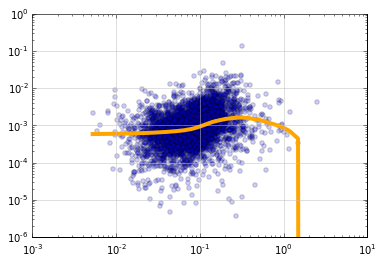

In [7]:
scatter_dicts(init_rates_stansfield, init_rates_plotkin)

Initiation rates according to Siwiak et al. (2010) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [8]:
file_siwiak = r'journal.pcbi.1000865.s003.CSV'
filepath_siwiak = os.path.join(datadir, file_siwiak)

with open(filepath_siwiak, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_siwiak = {elem[0]: float(elem[7]) for elem in content}
    orf_lengths = {elem[0]: float(elem[1]) for elem in content} # length of the transcript CDS in codons

In [9]:
pd.Series(init_rates_siwiak).describe()

count    4621.000000
mean        0.000062
std         0.000079
min         0.000000
25%         0.000020
50%         0.000037
75%         0.000070
max         0.000878
dtype: float64

4420


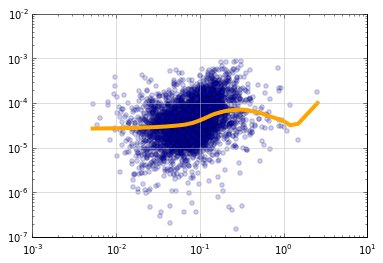

In [10]:
scatter_dicts(init_rates_stansfield, init_rates_siwiak)

4512


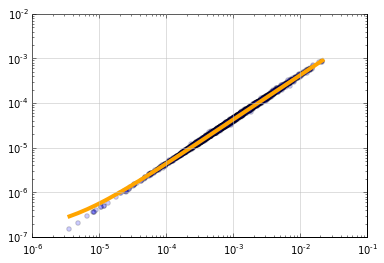

In [11]:
scatter_dicts(init_rates_plotkin, init_rates_siwiak)

In [12]:
pkl.dump(init_rates_stansfield, open("init_rates_stansfield.p", "wb"))
pkl.dump(init_rates_plotkin, open("init_rates_plotkin.p", "wb"))
pkl.dump(init_rates_siwiak, open("init_rates_siwiak.p", "wb"))

Plot correlation between orf lengths and initiation rates:

In [13]:
pd.Series(orf_lengths).describe()

count    4621.000000
mean      519.238909
std       374.253029
min        37.000000
25%       270.000000
50%       433.000000
75%       664.000000
max      4911.000000
dtype: float64

4512


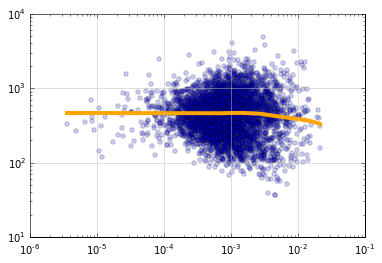

In [14]:
scatter_dicts(init_rates_plotkin, orf_lengths)

4621


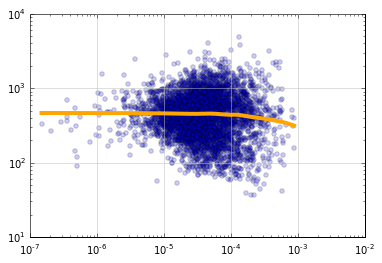

In [15]:
scatter_dicts(init_rates_siwiak, orf_lengths)

4420


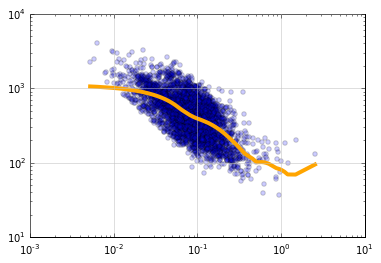

In [16]:
scatter_dicts(init_rates_stansfield, orf_lengths)

Initiation rates according to Plotkin et al. (private email from 17 June 2015):

In [2]:
file_plotkin2 = r"ingolia_recomputed_IPs.txt"
filepath_plotkin2 = os.path.join(datadir, file_plotkin2)

with open(filepath_plotkin2, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_rates_plotkin2 = {elem[0]: float(elem[5].strip()) for elem in content if float(elem[5].strip())>1E-80}

In [3]:
pd.Series(init_rates_plotkin2).describe()

count    2569.000000
mean        0.001920
std         0.003067
min         0.000070
25%         0.000567
50%         0.000999
75%         0.002047
max         0.061337
dtype: float64

In [5]:
init_rates_plotkin2["YJL124C"]

0.00192635790980853

In [6]:
init_rates_plotkin2["YHL015W"]

0.00255137757045158

2569


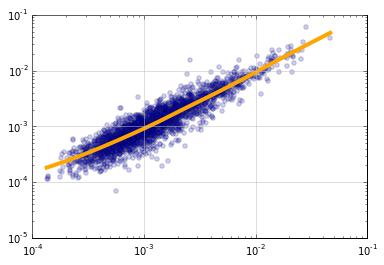

In [14]:
scatter_dicts(init_rates_plotkin, init_rates_plotkin2)

The error leads to a rather mild modification of initiation rates.

In [15]:
pkl.dump(init_rates_plotkin2, open("../parameters/init_rates_plotkin.p", "wb"))